<a href="https://colab.research.google.com/github/vineelnoel/LSTM_nonlinear/blob/main/LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

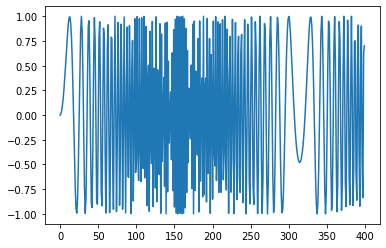

In [6]:
series = np.sin((0.1*np.arange(400))**2)
plt.plot(series)
plt.show()

In [7]:
T = 10
X = []
Y = []
D = 1

In [8]:
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

In [9]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(390, 10) (390,)


In [10]:
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i, x)

In [12]:
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01)
)

In [14]:
r = model.fit(
    X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80
)

Epoch 1/80
7/7 [==============================] - 1s 34ms/step - loss: 1.2664 - val_loss: 0.8102
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 1.0873 - val_loss: 0.7827
Epoch 3/80
7/7 [==============================] - 0s 7ms/step - loss: 0.9313 - val_loss: 0.7726
Epoch 4/80
7/7 [==============================] - 0s 8ms/step - loss: 0.7681 - val_loss: 0.7585
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.7142 - val_loss: 0.7375
Epoch 6/80
7/7 [==============================] - 0s 8ms/step - loss: 0.7160 - val_loss: 0.7165
Epoch 7/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6468 - val_loss: 0.7009
Epoch 8/80
7/7 [==============================] - 0s 9ms/step - loss: 0.6161 - val_loss: 0.6817
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5607 - val_loss: 0.6700
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5511 - val_loss: 0.6596
Epoch 11/80
7/7 [=====================

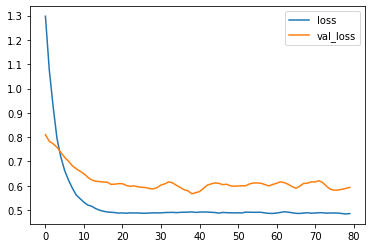

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [16]:
outputs = model.predict(X)

In [22]:
predictions = outputs[:,0]

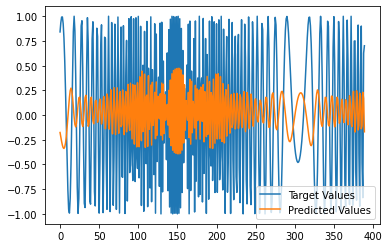

In [23]:
plt.plot(Y, label='Target Values')
plt.plot(predictions, label='Predicted Values')
plt.legend()
plt.show()

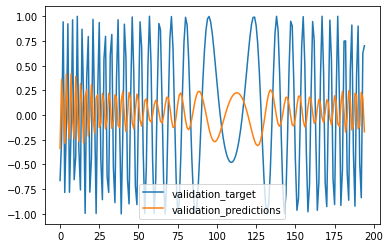

In [36]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i += 1
  validation_predictions.append(p)

plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()
plt.show()

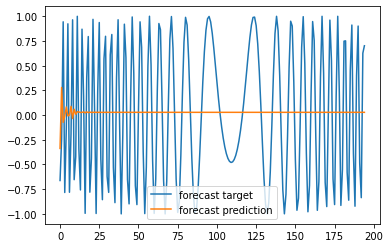

In [37]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] 
  
  validation_predictions.append(p)
  
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [40]:
# Using LSTM
X = X.reshape(-1,T,1)

i = Input(shape=(T,D))
x = LSTM(10)(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05)
)

r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:],Y[-N//2:]), batch_size=32, epochs=200)

Epoch 1/200
7/7 [==============================] - 2s 108ms/step - loss: 0.5438 - val_loss: 0.5842
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5483 - val_loss: 0.6313
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5221 - val_loss: 0.5722
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4836 - val_loss: 0.5768
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4153 - val_loss: 0.5178
Epoch 6/200
7/7 [==============================] - 0s 13ms/step - loss: 0.3363 - val_loss: 0.3762
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2992 - val_loss: 0.3864
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1929 - val_loss: 0.3325
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2691 - val_loss: 0.4517
Epoch 10/200
7/7 [==============================] - 0s 13ms/step - loss: 0.2379 - val_loss: 0.4273
Epoch 11/200
7/7 [

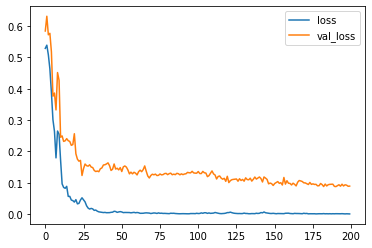

In [41]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


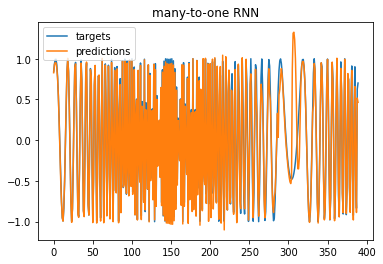

In [42]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

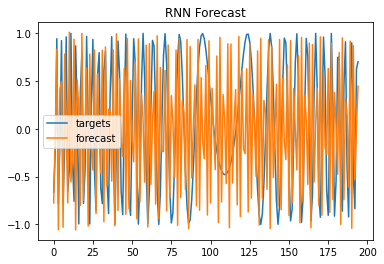

In [57]:
forecast = []
input_ = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()